### Introduction

In [1]:
import pandas as pd
df = pd.read_csv('./Downloads/garments_worker_productivity.csv', parse_dates=['date'])
print(df.head())

        date   quarter  department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2 2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0  

### Dataset Exploration

In [2]:
shape = df.shape
print(shape)
df.info()
print(df.describe())
for column in df.columns:
    print(df[column].value_counts()) # working on this

(1197, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64       

What type of data does each column include?
object - date, quarter, department, day
int - team, over_time, incentive, idle_men, no_of_style_change
float - targeted_productivity, smv, wip, idle_time, no_of_workers, actual_productivity

Are there any missing or incorrect values?
wip is missing 506 values

What is the count of observations for each unique value within each column? (printed above)

Compare relevant columns with each other

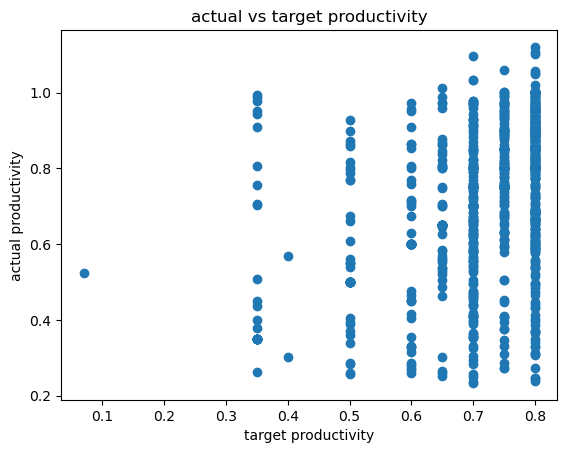

                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   
actual_productivity   -0.148753               0.421594 -0.122089  0.131147   

                       over_time  incentive  idle_time  idle_me

/var/folders/7g/05cm4jj579vf7_ghn0gwcsc00000gn/T/ipykernel_3204/975564927.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['targeted_productivity'], df['actual_productivity'])
plt.xlabel('target productivity')
plt.ylabel('actual productivity')
plt.title('actual vs target productivity')
plt.show()

print(df.corr())

There seems to be little correlation b/w actual and target productivity. Nevermind, apparently there's a correlation of .42.

Examine the value counts for the department column to determine the problem with the information in this column.

In [4]:
print(df['department'].value_counts())
print(df['department'].unique())

# I'm going to change the finishing with a space after to finishing

df['department'] = df['department'].apply(lambda value: 'finishing' if value == 'finishing ' else value)
print(df['department'].value_counts())
print(df['department'].unique())

print(df.columns)

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
['sweing' 'finishing ' 'finishing']
sweing       691
finishing    506
Name: department, dtype: int64
['sweing' 'finishing']
Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


Remove the columns you consider unnecessary for a tree model and/or that contain unrelated data. Explain why you're removing them. 

Columns are: 'date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'
       
actual_productivity is the outcome
date - I guess there could be a correlation b/w the date and productivity. Though probably a small one. I haven't looked into it yet
quarter - the week of the month seems unlikely to matter. Leaning towards dropping this
department - some departments could be more effective than others. I'd guess I should definitely include this
day (of the week) - this could matter
team - this could matter
targeted productivity - this could matter too
standard minute value - the amount of time given for a task. this seems like it could affect productivity also
work in progress - the number of unfinished items. it seems like this could relate to productivity too
over_time - also seems like it could affect productivity
incentive - financial incentive also seems like it could affect productivity
idle_time / idle_men - seem relevant, but should probably only keep one
no_of_style_change - seems relevant
no_of_workers - seems relevant

based on asking myself if any columns seem irrelevant and redundant I'm going to drop quarter and idle_men

Next I'm going to think about the rest of the things the instructions encouraged me to consider

wip is missing so many values I'm inclined to remove it.

Does the column feature the appropriate data type to fit a decision tree? If not, what options do we have to transform the values?

So date, department and day are the ones I might need to change. I can use one-hot encoding for department.

I'm planning to exclude date. I'm not convinced classification trees are a good fit for date since I'd need to split it up into 3 separate columns.

I think I'll one hot encode day too.

Alright. So the plan is to exclude date, wip, quarter and idle_man
       

In [5]:
# columns_to_use = df[['department', 'day', 'team', 'targeted_productivity',
#        'smv', 'over_time', 'incentive', 'idle_time', 'no_of_style_change', 'no_of_workers', 'actual_productivity']]

# one_hot_encoded = pd.get_dummies(columns_to_use, columns=['department', 'day'], drop_first=True)
# print(one_hot_encoded)
# X = one_hot_encoded.copy()

Create the target column for a classification tree, using both productivity columns.

I think I'll do this by multiplying the percent of actual productivity by the target productivity

In [6]:
# df['total_productivity'] = df['targeted_productivity'] * df['actual_productivity']
# print(df)
# y = df['total_productivity']

Looking over the answer:

they also cleaned the department column

They also dropped the date.

I guess I could keep the quarter column. It doesn't seem like a big deal. I might do it so I match the answer.

"We will get rid of the "idle_time" & "idle_men" columns, as there are only 18 observations with non-zero values. Therefore they are pretty uniform columns and they barely add any information." - this makes sense

they removed wip too

"Finally, we will remove the "no_of_style_change" column, due to only 147 observations where there are changes. Also, they were only one or two style changes." seems reasonable

After finishing with all the column deletions, let's focus on the "no_of_workers" column, which features floats instead of integers. We should fix this because we can't have 1.25 workers; it's either 1 or 2. This makes sense.

Also, "actual_productivity" should feature two decimals, just like "targeted_productivity". (I don't see why this is good, but I'll copy the solution for now.)

The following step is crucial: since we are building a Classification Tree and not a Regression Tree, our target column "actual_productivity" must be categorical, not numerical.To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset. - this seems fine.

So what they're dropping is date, idle_time, idle_men, wip,no_of_style_change

In [7]:
import pandas as pd

# Define a dictionary that maps the old values to the new values
replacement_dict = {
    'Quarter1': 1,
    'Quarter2': 2,
    'Quarter3': 3,
    'Quarter4': 4,
    'Quarter5': 4
}

# Replace the values in the quarter column using the replacement dictionary
df['quarter'] = df['quarter'].replace(replacement_dict)

# print(df['quarter'].unique())

df['no_of_workers'] = df['no_of_workers'].astype(int)
# print(df['no_of_workers'].unique())

df['actual_productivity'] = df['actual_productivity'].round(2)

# print(df['actual_productivity'])

df['productive'] = df['actual_productivity'] >= df['targeted_productivity']
print(df['productive'])

df_copy = df.copy()
df_cleaned = df[["quarter", "day", "department", "team", "no_of_workers", "targeted_productivity", 
        "actual_productivity", "productive", "over_time", "smv", "incentive"]]

0        True
1        True
2        True
3        True
4        True
        ...  
1192    False
1193    False
1194    False
1195    False
1196    False
Name: productive, Length: 1197, dtype: bool


Identify the columns that contain categorical observations.
quarter - I think this one is categorical
day - categorical
department - categorical
team - categorical
no_of_workers - numerical
over_time - numerical
smv - numerical
incentive - numerical

targeted_productivity - numerical 
actual_productivity - numerical
productive - categorical (the target)

In [8]:
df_without_target = df_cleaned[["quarter", "day", "department", "team", "no_of_workers", "over_time", "smv", "incentive"]]

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformed_columns = make_column_transformer((OneHotEncoder(), ['quarter', 'day', 'department', 'team']), verbose_feature_names_out=False, remainder='passthrough')
onehot_df = transformed_columns.fit_transform(df_without_target)

print(onehot_df)

# Convert the sparse matrix to a dense array
onehot_df = onehot_df.toarray()
print(onehot_df)
df = pd.DataFrame(onehot_df, columns=transformed_columns.get_feature_names_out())
# from IPython.display import display

# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None):
#     display(df)

df = df.rename({'quarter_1': 'q_1', 'quarter_2': 'q_2', 'quarter_3': 'q_3', 'quarter_4': 'q_4'}, axis=1)
pd.set_option('display.max_columns', None)
print(df)

  (0, 0)	1.0
  (0, 7)	1.0
  (0, 11)	1.0
  (0, 19)	1.0
  (0, 24)	59.0
  (0, 25)	7080.0
  (0, 26)	26.16
  (0, 27)	98.0
  (1, 0)	1.0
  (1, 7)	1.0
  (1, 10)	1.0
  (1, 12)	1.0
  (1, 24)	8.0
  (1, 25)	960.0
  (1, 26)	3.94
  (2, 0)	1.0
  (2, 7)	1.0
  (2, 11)	1.0
  (2, 22)	1.0
  (2, 24)	30.0
  (2, 25)	3660.0
  (2, 26)	11.41
  (2, 27)	50.0
  (3, 0)	1.0
  (3, 7)	1.0
  :	:
  (1193, 19)	1.0
  (1193, 24)	8.0
  (1193, 25)	960.0
  (1193, 26)	3.9
  (1194, 1)	1.0
  (1194, 9)	1.0
  (1194, 10)	1.0
  (1194, 18)	1.0
  (1194, 24)	8.0
  (1194, 25)	960.0
  (1194, 26)	3.9
  (1195, 1)	1.0
  (1195, 9)	1.0
  (1195, 10)	1.0
  (1195, 20)	1.0
  (1195, 24)	15.0
  (1195, 25)	1800.0
  (1195, 26)	2.9
  (1196, 1)	1.0
  (1196, 9)	1.0
  (1196, 10)	1.0
  (1196, 17)	1.0
  (1196, 24)	6.0
  (1196, 25)	720.0
  (1196, 26)	2.9
[[1.000e+00 0.000e+00 0.000e+00 ... 7.080e+03 2.616e+01 9.800e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 9.600e+02 3.940e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 3.660e+03 1.141e+01 5.000e+01]
 ...


Building the Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = df
y = df_cleaned['productive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=24)

dtc = DecisionTreeClassifier(max_depth=3, random_state=24)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
# print(y_pred)

### Visualizing and evaluating the tree

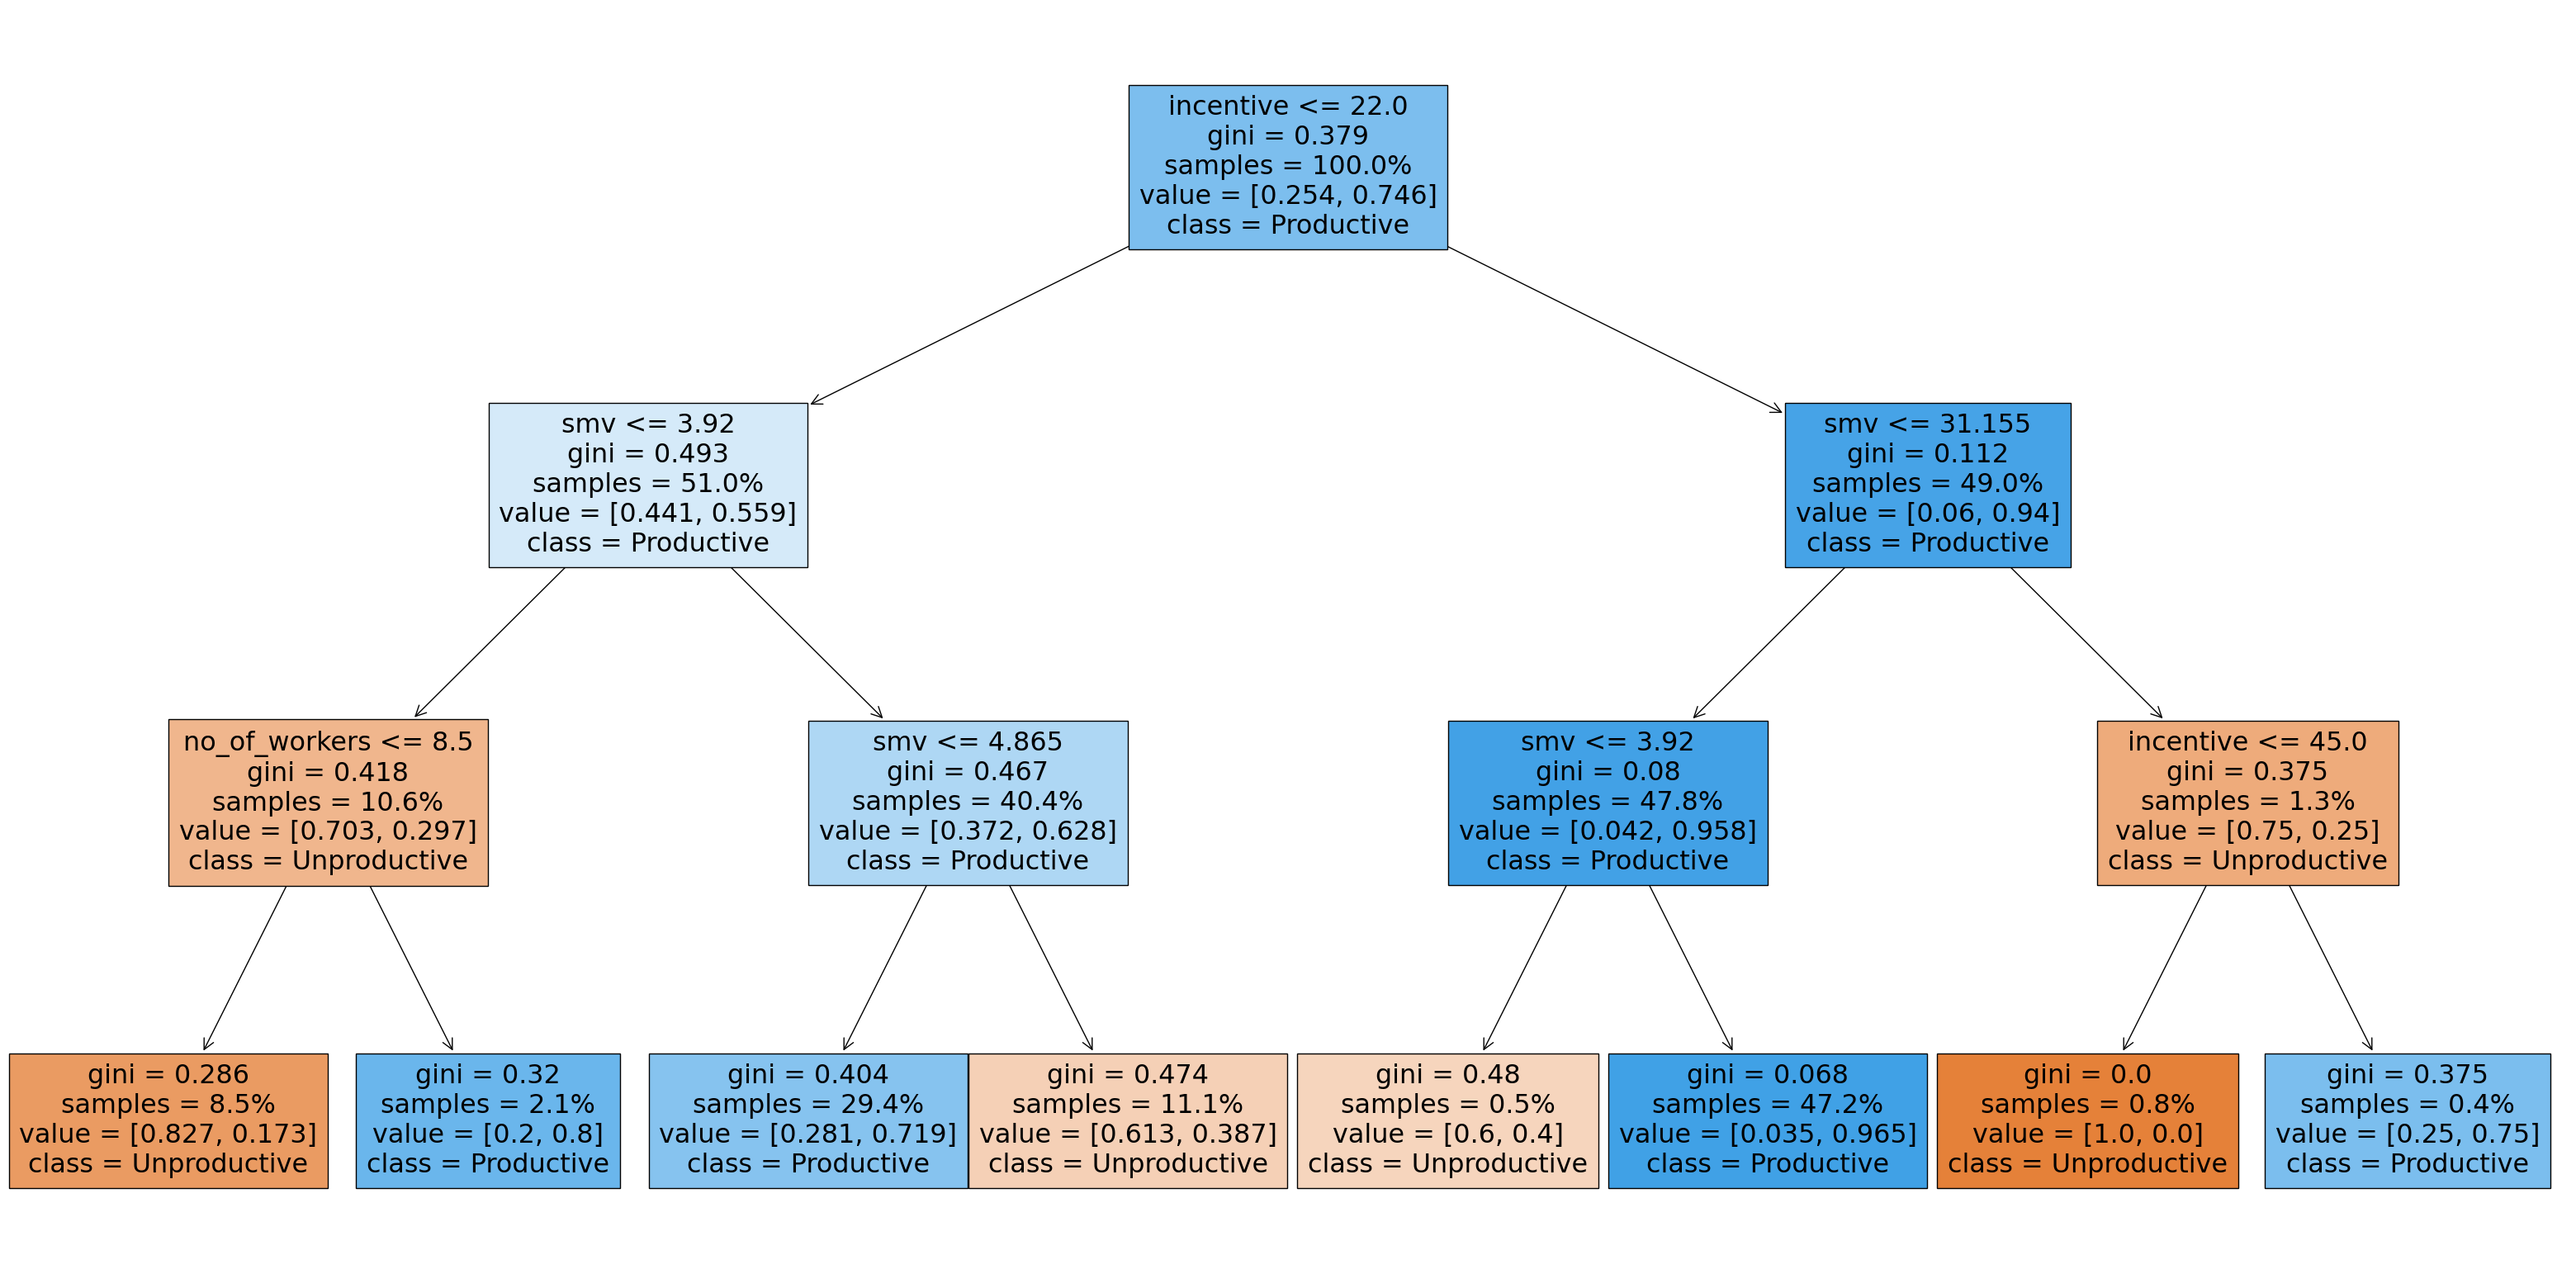

True     714
False    243
Name: productive, dtype: int64
0.8458333333333333
Precision: 0.88
Recall: 0.93
F1 Score: 0.90
[[ 35  24]
 [ 13 168]]


In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

# customize according to the size of your tree
plt.figure(figsize=(40,20))

# your_model_name is the name of your trained decision tree model
# X.columns are the feature names of your dataset
_ = tree.plot_tree(dtc, feature_names=X.columns, class_names = ["Unproductive", "Productive"], filled=True, proportion=True)

plt.show()

# print(y.value_counts())
print(y_train.value_counts())

score = dtc.score(X_test, y_test)
print(score)

from sklearn.metrics import precision_score, recall_score, f1_score

# y_test are the true labels
# y_pred are the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


from sklearn.metrics import confusion_matrix

# y_test are the true labels
# y_pred are the predicted labels
cm = confusion_matrix(y_test, y_pred)

print(cm)


In [11]:
from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier

# X is the feature matrix
# y is the target vector
# cv specifies the number of folds
# scoring specifies the performance metric
# scores = cross_val_score(DecisionTreeClassifier(random_state=24), X, y, cv=10, scoring='accuracy')
# print(scores)
# mean_score = scores.mean()
# print(mean_score)

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# create a new instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=24)

# create a dictionary of scorers
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}

# X is the feature matrix
# y is the target vector
# cv specifies the number of folds
scores = cross_validate(clf, X, y, cv=10, scoring=scoring)

# print the scores for each fold
print('Precision:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1:', scores['test_f1'])
print('Accuracy:', scores['test_accuracy'])

# compute the mean scores
precision_mean = scores['test_precision'].mean()
recall_mean = scores['test_recall'].mean()
f1_mean = scores['test_f1'].mean()
accuracy_mean = scores['test_accuracy'].mean()

# print the mean scores
print('Mean Precision:', precision_mean)
print('Mean Recall:', recall_mean)
print('Mean F1:', f1_mean)
print('Mean Accuracy:', accuracy_mean)

Precision: [0.81818182 0.88043478 0.85057471 0.80645161 0.81111111 0.80898876
 0.80232558 0.85714286 0.87058824 0.8172043 ]
Recall: [0.9        0.9        0.82222222 0.83333333 0.81111111 0.80898876
 0.7752809  0.80898876 0.83146067 0.85393258]
F1: [0.85714286 0.89010989 0.83615819 0.81967213 0.81111111 0.80898876
 0.78857143 0.83236994 0.85057471 0.83516484]
Accuracy: [0.775      0.83333333 0.75833333 0.725      0.71666667 0.71666667
 0.69166667 0.75630252 0.78151261 0.74789916]
Mean Precision: 0.8323003776401064
Mean Recall: 0.8345318352059925
Mean F1: 0.8329863864223214
Mean Accuracy: 0.7502380952380953


### Explaining The Tree

The incentive (financial incentive) and smv (time allocated to a task) seems to be the most important predictors of whether actual productivity will meet the targets.

Now we can predict how a future task will be as productive as predicted by using the tree

### Using Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=24, oob_score=True)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
score = random_forest.score(X_test, y_test)
print(score)
print(random_forest.oob_score_)

0.8375
0.8380355276907001


In [18]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create a new instance of RandomForestClassifier
clf = RandomForestClassifier(random_state=24)

# specify the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a new instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.8327988656195464
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=24)


Random forest didn't improve over the decision tree. Solution final thoughts are listed [here](https://github.com/dataquestio/solutions/blob/master/Mission755Solutions.ipynb) 